## Hypothesis
DV1=INT

In [6]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];


data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT"        
 [71] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [76] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [81] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [86] "IncWD"       "Income"      "Job"         "Latitude"    "Longitude"  
 [91] "MC"          "MC1"         "MC2"         "MC3"         "MC4"        
 [96] "MC5"         "MCBill"      "MCG"         "NBillS"      "NBillW"     
[101] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
[106] "PBC4"        "PBC5"        "PBillStatus" "Political"   "ReasonNeg"  
[111] "ReasonPos"   "RewardForm"  "SN"          "SN1"         "SN2"        
[116] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
[121] "SubN"        "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
[126] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"     
[131] "Trust2"      "Trust3"      "Trust4"      "Utility"     "Winter_avg" 
[136] "Winter_avgC" "Winter_avgF" "X.9to5"      "cold"        "hot"        
[141] "row"         "valid"       "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3 
232 261 331 

In [10]:
#here we investigate only use people who use A/C when being at home in summer
# EnergyC, MC, Att, SubNorm, PBC, HabitC - ComfNS extra from the full model below
library(xtable)
#Age, Gender, OwnRent, SqftCat, Income, Educ, EnergyC, MC, Attitude, SubNorm, PBC, HabitC, ComfNS,    
IndepPred = c("Age","OwnRent","SqftCate","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ComfNS")

fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
data2 = data1[data1$HomeSYN==1,which(names(data1) %in% c("INT", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")

[1] "10"            " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.0681,0.3168,-0.22,8.3e-01
Age,-0.0045,0.0031,-1.44,1.5e-01
OwnRent,-0.0111,0.0737,-0.15,8.8e-01
SqftCate,-0.0267,0.0343,-0.78,4.4e-01
Income,-0.0148,0.0186,-0.79,4.3e-01
Educ,0.0248,0.0305,0.81,4.2e-01
EnergyC,0.0906,0.0284,3.19,1.5e-03
MC,0.1396,0.0334,4.18,3.4e-05
Attitude,0.3557,0.0377,9.42,7.9e-20
SubNorm,0.1135,0.0265,4.28,2.2e-05


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 16:12:52 2017 -->
<table border=1>
<caption align="bottom"> N=652 Adj-R2=0.49 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> -0.07 </td> <td align="right"> 0.32 </td> <td align="right"> -0.22 </td> <td align="right"> 0.83 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> -0.00 </td> <td align="right"> 0.00 </td> <td align="right"> -1.44 </td> <td align="right"> 0.15 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"> -0.01 </td> <td align="right"> 0.07 </td> <td align="right"> -0.15 </td> <td align="right"> 0.88 </td> </tr>
  <tr> <td align="right"> SqftCate </td> <td align="right"> -0.03 </td> <td align="right"> 0.03 </td> <td align="right"> -0.78 </td> <td align="right"> 0.44 </td> </tr>
  <tr> <td align="right"> Income </td> <td align=

Age  OwnRent SqftCate   Income     Educ  EnergyC       MC Attitude 
     1.2      1.4      1.4      1.3      1.1      1.6      1.3      1.7 
 SubNorm      PBC   HabitC   ComfNS 
     1.2      1.1      1.2      1.1

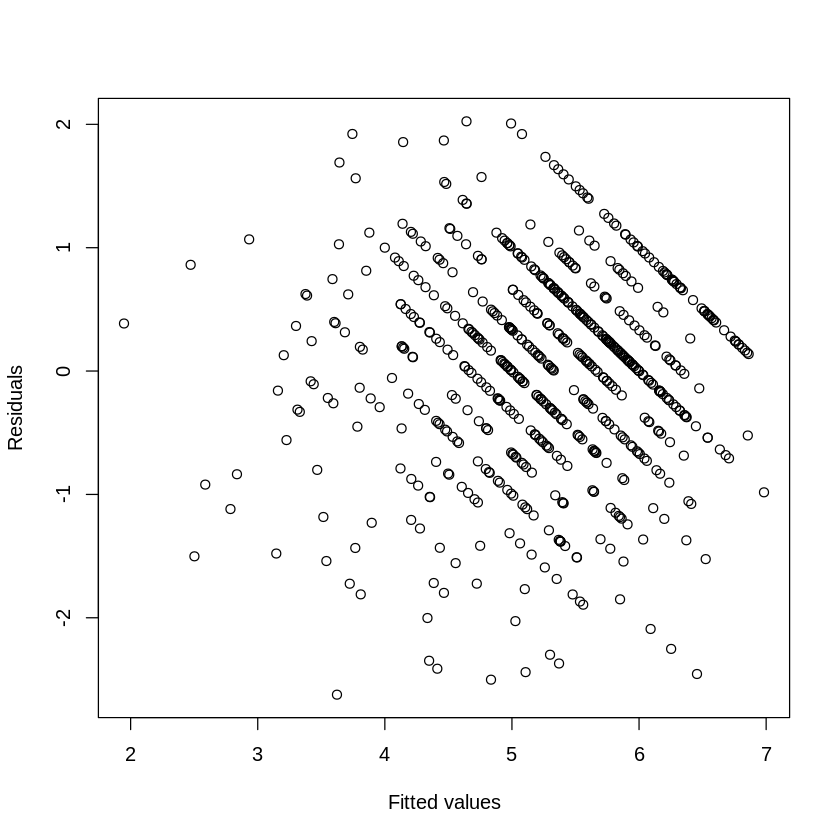

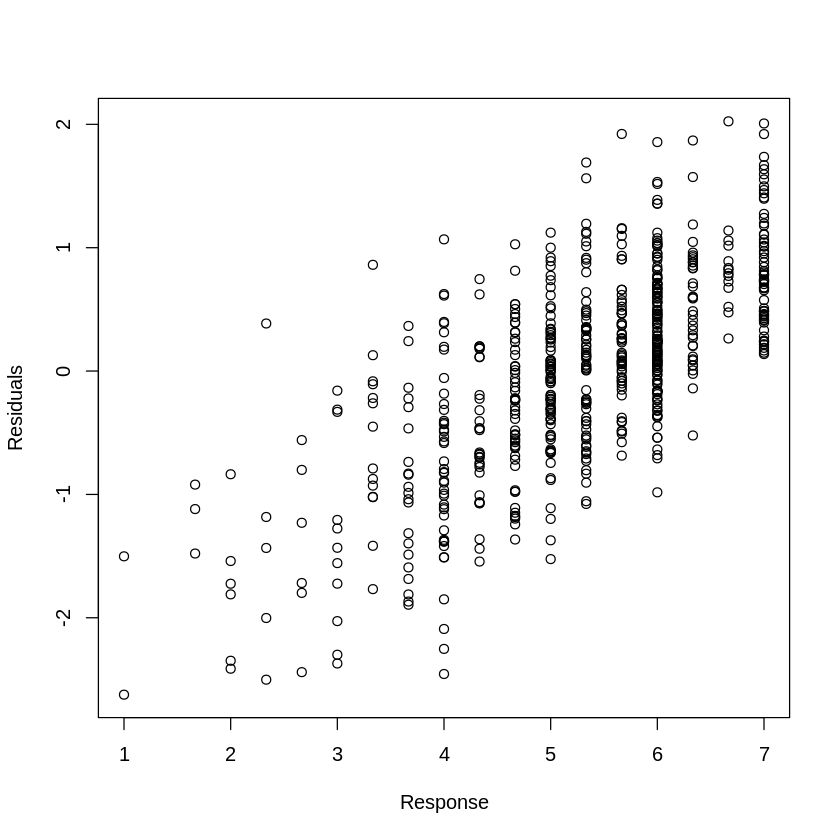

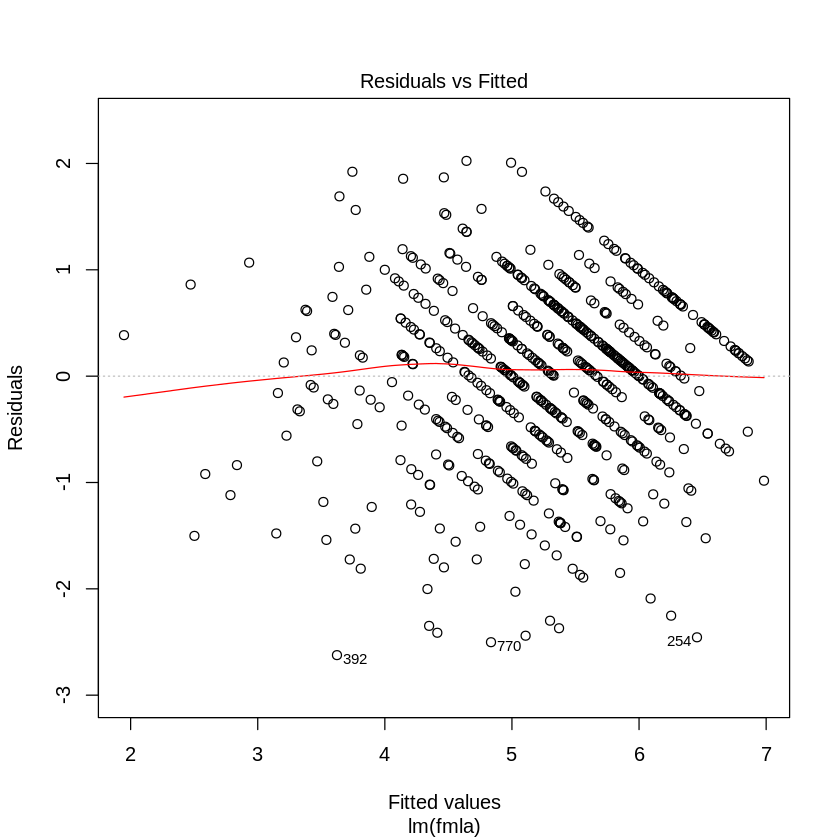

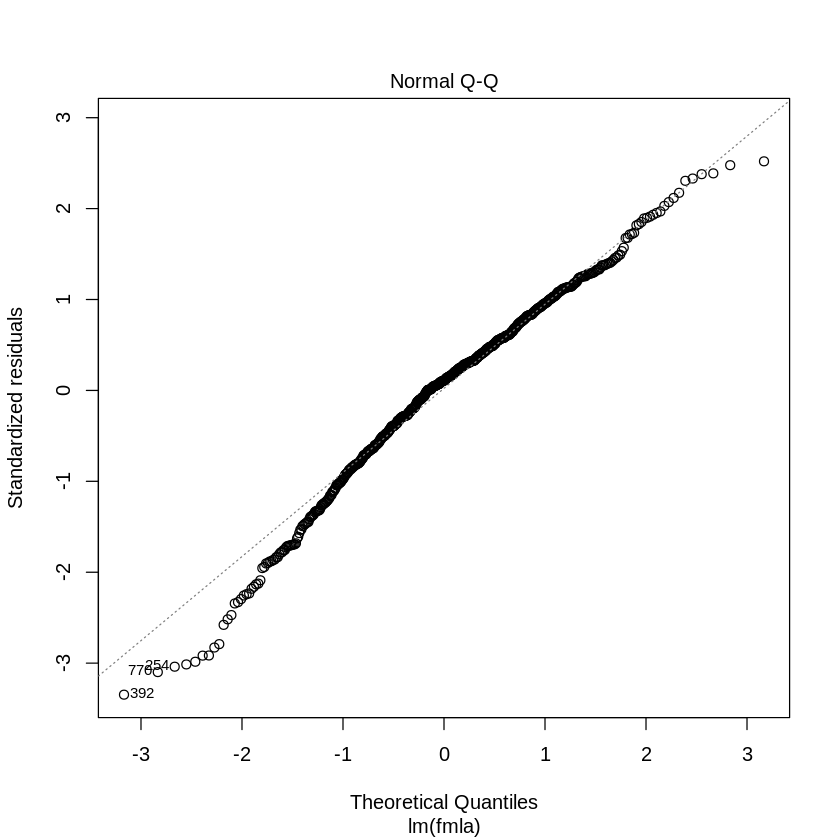

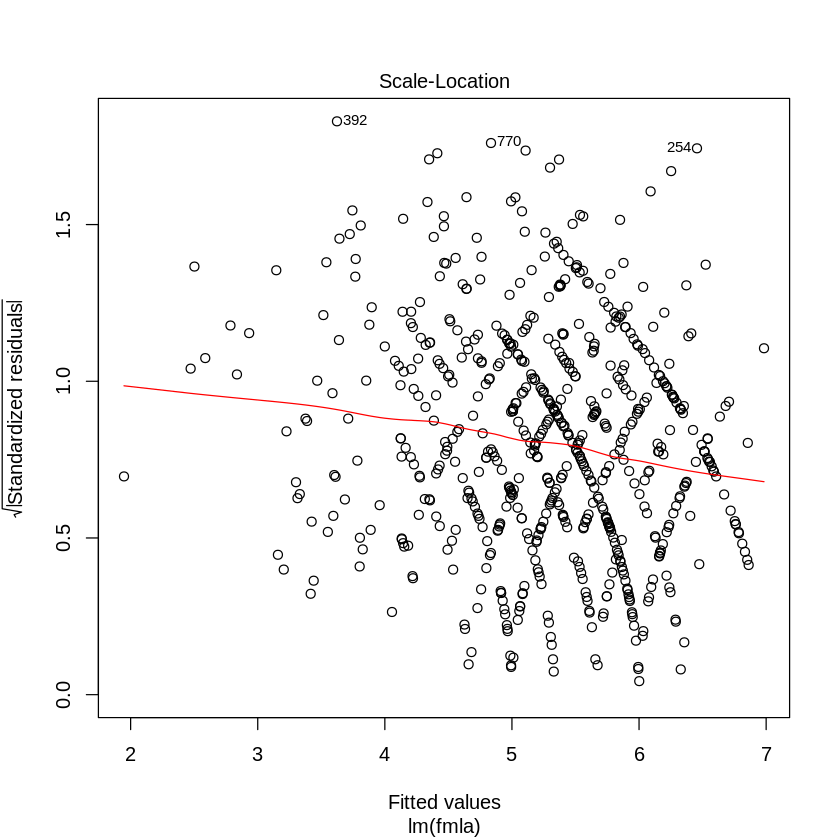

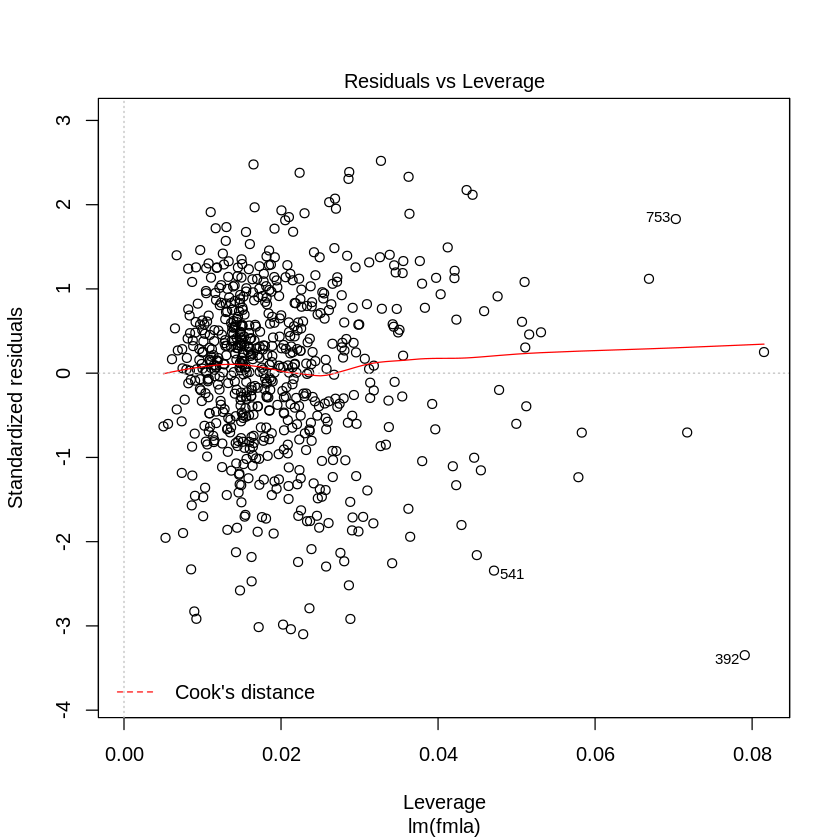

In [11]:
#Diagnostics
library(car)
vif(mod)
plot(mod$fitted.values,mod$residuals, xlab="Fitted values", ylab="Residuals")    
plot(data2$INT,mod$residuals, xlab="Response", ylab="Residuals")

plot(mod)

In [13]:
#We investigate all people: EnergyC, MC, Att, SubNorm, PBC, HabitC
data <- survey[,-c(1:7)];
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
data2 = data1[,which(names(data1) %in% c("INT", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")

[1] "13"            " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.2684,0.2843,-0.944,3.5e-01
Age,-0.0028,0.0029,-0.990,3.2e-01
OwnRent,-0.0143,0.0682,-0.210,8.3e-01
SqftCate,-0.0258,0.0308,-0.838,4.0e-01
Income,-0.0148,0.0167,-0.889,3.7e-01
Educ,0.0013,0.0276,0.048,9.6e-01
EnergyC,0.0751,0.0263,2.861,4.3e-03
MC,0.1478,0.0306,4.836,1.6e-06
Attitude,0.3801,0.0351,10.822,1.4e-25
SubNorm,0.1050,0.0241,4.350,1.5e-05


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 16:13:19 2017 -->
<table border=1>
<caption align="bottom"> N=813 Adj-R2=0.49 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> -0.27 </td> <td align="right"> 0.28 </td> <td align="right"> -0.94 </td> <td align="right"> 0.35 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> -0.00 </td> <td align="right"> 0.00 </td> <td align="right"> -0.99 </td> <td align="right"> 0.32 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"> -0.01 </td> <td align="right"> 0.07 </td> <td align="right"> -0.21 </td> <td align="right"> 0.83 </td> </tr>
  <tr> <td align="right"> SqftCate </td> <td align="right"> -0.03 </td> <td align="right"> 0.03 </td> <td align="right"> -0.84 </td> <td align="right"> 0.40 </td> </tr>
  <tr> <td align="right"> Income </td> <td align=

Older analysis below

In [2]:
tmp <- cbind(INT1=data1$INT1,INT2=data1$INT2,INT3=data1$INT3)
data1$INT <- rowMeans(tmp)

In [3]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      
[1] "Summer_avgF" "42"         
[1] "Winter_avgF" "42"         
[1] "Summer_avgC" "42"         
[1] "Winter_avgC" "42"         
[1] "Summer_avg" "42"        
[1] "Winter_avg" "42"        


In [4]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826 106
[1] 597 106


In [5]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"EnergyC",
"MC",
"Attitude",
"SubNorm",
"PBC",
"HabitC",
"HabitG",
"ConvB1",
"ComfNS",
"ComfNW",
"INT",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT"         "INT1"        "INT2"        "INT3"       
 [56] "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"        "Attitude"   "CashYN"     "ComfNS"     "ComfNW"    
 [6] "ConvB1"     "Educ"       "EnergyC"    "Ethnic"     "Gender"    
[11] "HabitC"     "HabitG"     "HouseholdS" "INT"        "Income"    
[16] "MC"         "OwnRent"    "PBC"        "Political"  "SqftCate"  
[21] "SubNorm"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "Attitude"   "PBC"        "CashYN"    
[16] "MC"         "ComfNS"     "ComfNW"     "SubNorm"    "HabitG"    
[21] "HabitC"     "INT"

In [10]:
data1 [is.na(data1$IncHomeS), ]

Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IncHomeS,ConvB1,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,...,Attitude,PBC,CashYN,MC,ComfNS,ComfNW,SubNorm,HabitG,HabitC,INT


In [11]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 50  41 115 202  54  56  45  34 


  1   2   3   4   5 
 66 213 133 111  74 

In [12]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "Attitude"   "PBC"        "CashYN"    
[16] "MC"         "ComfNS"     "ComfNW"     "SubNorm"    "HabitG"    
[21] "HabitC"     "INT"

In [13]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [14]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS     ConvB1        Age     Gender    OwnRent   SqftCate HouseholdS 
      1.81       1.25      11.21       0.50       0.52       1.12       1.21 
 Political     Ethnic     Income       Educ    EnergyC   Attitude        PBC 
      0.83       0.38       2.00       1.10       1.39       1.10       0.94 
    CashYN         MC     ComfNS     ComfNW    SubNorm     HabitG     HabitC 
      0.27       1.08       1.46       1.74       1.35       1.17       1.42 
       INT 
      1.14

In [15]:
hiCor(data2,.7)

<0 x 0 matrix>

In [16]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.17
    ConvB1 EnergyC Attitude   PBC   MC SubNorm HabitG HabitC   INT
PC1   0.32   -0.34    -0.38 -0.24 -0.3   -0.28  -0.27  -0.24 -0.41
[1] 0.27
     Age OwnRent SqftCate HouseholdS Income
PC2 0.36     0.5     0.51       0.25   0.43
[1] 0.34
    IncHomeS Gender HouseholdS Ethnic Educ ComfNS ComfNW HabitC
PC3    -0.23  -0.42      -0.37   0.29 0.29  -0.27  -0.47   0.28
[1] 0.41
    IncHomeS ConvB1 Political Ethnic  Educ EnergyC  PBC   MC ComfNS HabitG
PC4      0.2  -0.25     -0.41   0.27 -0.28   -0.27 0.37 0.22   0.34   0.23
[1] 0.47
    IncHomeS  Age HouseholdS Political  Educ CashYN ComfNS
PC5    -0.46 -0.3       0.41     -0.26 -0.39   -0.3   -0.3
[1] 0.52
    IncHomeS  Age Gender Income   PBC CashYN HabitC
PC6     0.24 0.28   0.36  -0.28 -0.21  -0.58   0.22
[1] 0.57
    IncHomeS ConvB1 Ethnic EnergyC ComfNW SubNorm HabitG HabitC
PC7    -0.23  -0.28   0.49    0.22  -0.22    -0.3  -0.41  -0.37
[1] 0.61
    ConvB1 Gender Political Ethnic  Educ ComfNW SubNorm
PC8  -0.27  -0.28     

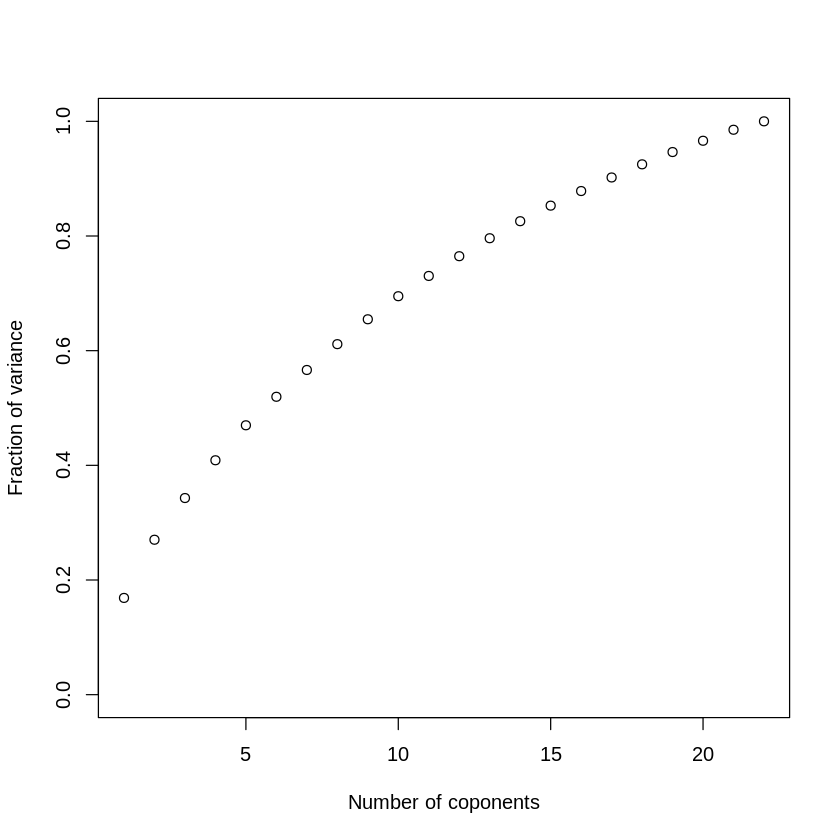

In [17]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [18]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [19]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

INT,22,0.52
Attitude,13,0.51
EnergyC,12,0.41
SqftCate,6,0.38
ConvB1,2,0.35
OwnRent,5,0.33
MC,16,0.28
HabitC,21,0.28
Income,10,0.27
HouseholdS,7,0.26
PBC,14,0.25


In [20]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS     ConvB1        Age     Gender    OwnRent   SqftCate HouseholdS 
      0.96       0.72       0.84       0.95       0.55       0.45       0.88 
 Political     Ethnic     Income       Educ    EnergyC   Attitude        PBC 
      0.93       0.99       0.73       0.98       0.63       0.44       0.84 
    CashYN         MC     ComfNS     ComfNW    SubNorm     HabitG     HabitC 
      0.99       0.73       0.95       0.97       0.77       0.83       0.85 
       INT 
      0.39 

Loadings:
           Factor1 Factor2
ConvB1     -0.52          
EnergyC     0.61          
Attitude    0.75          
MC          0.52          
INT         0.78          
OwnRent             0.67  
SqftCate            0.74  
Income              0.51  
IncHomeS                  
Age                 0.40  
Gender                    
HouseholdS          0.34  
Political                 
Ethnic                    
Educ           

In [21]:
#Age, Gender, OwnRent, SqftCat, Income, Educ, EnergyC, MC, Attitude, SubNorm, PBC, HabitC, ComfNS,    
IndepPred = c("Age","OwnRent","SqftCate","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ComfNS")

fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));

In [22]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5551 -0.4512  0.0745  0.5189  2.0059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04399    0.33605    0.13   0.8959    
Age         -0.00540    0.00321   -1.69   0.0924 .  
OwnRent     -0.00573    0.07709   -0.07   0.9407    
SqftCate    -0.04148    0.03544   -1.17   0.2423    
Income      -0.00548    0.01888   -0.29   0.7718    
Educ         0.01604    0.03179    0.50   0.6140    
EnergyC      0.07834    0.02954    2.65   0.0082 ** 
MC           0.12796    0.03420    3.74   0.0002 ***
Attitude     0.38177    0.03902    9.78  < 2e-16 ***
SubNorm      0.11718    0.02740    4.28  2.2e-05 ***
PBC          0.25470    0.03753    6.79  2.8e-11 ***
HabitC       0.10786    0.02490    4.33  1.7e-05 ***
ComfNS      -0.05905    0.02353   -2.51   0.0124 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8 on 584 degre

In [23]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.40,0.40,0.62,4.3e-01
OwnRent,1,0.86,0.86,1.34,2.5e-01
SqftCate,1,4.80,4.80,7.44,6.6e-03
Income,1,0.93,0.93,1.44,2.3e-01
Educ,1,6.24,6.24,9.66,2.0e-03
EnergyC,1,142.11,142.11,219.96,1.8e-42
MC,1,67.81,67.81,104.95,9.2e-23
Attitude,1,98.30,98.30,152.15,3.1e-31
SubNorm,1,20.49,20.49,31.72,2.8e-08
PBC,1,33.18,33.18,51.36,2.3e-12


In [24]:
library(car)
vif(mod)

Age  OwnRent SqftCate   Income     Educ  EnergyC       MC Attitude 
     1.2      1.5      1.5      1.3      1.1      1.6      1.3      1.7 
 SubNorm      PBC   HabitC   ComfNS 
     1.3      1.1      1.2      1.1

In [25]:
#added CashYN to model
IndepPred = c("Age","Gender","OwnRent","SqftCate","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ComfNS","CashYN")
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5900 -0.4459  0.0784  0.5318  2.2101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.09248    0.35009   -0.26  0.79176    
Age         -0.00557    0.00322   -1.73  0.08408 .  
Gender      -0.03129    0.06899   -0.45  0.65033    
OwnRent      0.00360    0.07711    0.05  0.96277    
SqftCate    -0.03916    0.03542   -1.11  0.26934    
Income      -0.00834    0.01896   -0.44  0.66004    
Educ         0.01375    0.03177    0.43  0.66536    
EnergyC      0.08102    0.02968    2.73  0.00652 ** 
MC           0.12386    0.03422    3.62  0.00032 ***
Attitude     0.38026    0.03926    9.69  < 2e-16 ***
SubNorm      0.11714    0.02737    4.28  2.2e-05 ***
PBC          0.25126    0.03751    6.70  4.9e-11 ***
HabitC       0.11137    0.02492    4.47  9.4e-06 ***
ComfNS      -0.06052    0.02357   -2.57  0.01051 *  
CashYNTRUE   0.24251    0.12254    1.98  0.04829 *  
---

In [26]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.40,0.40,0.62,4.3e-01
Gender,1,13.04,13.04,20.26,8.2e-06
OwnRent,1,0.68,0.68,1.05,3.1e-01
SqftCate,1,5.03,5.03,7.81,5.4e-03
Income,1,0.31,0.31,0.48,4.9e-01
Educ,1,6.69,6.69,10.40,1.3e-03
EnergyC,1,130.13,130.13,202.17,1.4e-39
MC,1,67.19,67.19,104.39,1.2e-22
Attitude,1,98.31,98.31,152.74,2.5e-31
SubNorm,1,20.70,20.70,32.15,2.2e-08


In [31]:
#economic factor model
econ = c("OwnRent","SqftCate","Income","MC")
fmla <- as.formula(paste("INT",paste(econ,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.845 -0.550  0.139  0.672  3.484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2424     0.2673   12.13   <2e-16 ***
OwnRent      -0.0503     0.0960   -0.52     0.60    
SqftCate     -0.0698     0.0452   -1.55     0.12    
Income       -0.0102     0.0235   -0.43     0.66    
MC            0.4247     0.0397   10.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1 on 592 degrees of freedom
Multiple R-squared:  0.17,	Adjusted R-squared:  0.164 
F-statistic: 30.3 on 4 and 592 DF,  p-value: <2e-16


In [32]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
OwnRent,1,1.20,1.20,1.11,2.9e-01
SqftCate,1,4.87,4.87,4.50,3.4e-02
Income,1,0.93,0.93,0.86,3.5e-01
MC,1,123.98,123.98,114.60,1.4e-24
Residuals,592,640.48,1.08,NA,NA


In [36]:
#non economic factor model
non_econ = c("Age","Gender","EnergyC","Attitude","SubNorm","PBC","HabitC","ComfNS")
fmla <- as.formula(paste("INT",paste(non_econ,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5601 -0.4589  0.0633  0.5285  2.3070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24835    0.30921    0.80   0.4222    
Age         -0.00592    0.00301   -1.97   0.0498 *  
Gender      -0.03205    0.06923   -0.46   0.6436    
EnergyC      0.08968    0.02986    3.00   0.0028 ** 
Attitude     0.41310    0.03879   10.65  < 2e-16 ***
SubNorm      0.12837    0.02743    4.68  3.6e-06 ***
PBC          0.28640    0.03690    7.76  3.7e-14 ***
HabitC       0.11356    0.02499    4.55  6.7e-06 ***
ComfNS      -0.06033    0.02373   -2.54   0.0113 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.81 on 588 degrees of freedom
Multiple R-squared:  0.497,	Adjusted R-squared:  0.49 
F-statistic: 72.6 on 8 and 588 DF,  p-value: <2e-16


In [37]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.4,0.40,0.61,4.4e-01
Gender,1,13.0,13.04,19.76,1.0e-05
EnergyC,1,138.8,138.83,210.40,5.6e-41
Attitude,1,138.4,138.40,209.76,7.1e-41
SubNorm,1,27.3,27.26,41.32,2.7e-10
PBC,1,44.4,44.39,67.28,1.5e-15
HabitC,1,16.9,16.89,25.59,5.6e-07
ComfNS,1,4.3,4.27,6.46,1.1e-02
Residuals,588,388.0,0.66,NA,NA


In [38]:
#added CashYN to model
IndepPred = c("Age","Gender","OwnRent","SqftCate","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ComfNS","IncHomeS")
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6717 -0.4323  0.0774  0.5373  1.9727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26479    0.34485    0.77  0.44289    
Age         -0.00401    0.00323   -1.24  0.21428    
Gender      -0.02885    0.06872   -0.42  0.67473    
OwnRent     -0.00151    0.07666   -0.02  0.98430    
SqftCate    -0.04330    0.03528   -1.23  0.22024    
Income      -0.00792    0.01886   -0.42  0.67473    
Educ         0.01655    0.03164    0.52  0.60107    
EnergyC      0.07803    0.02956    2.64  0.00853 ** 
MC           0.12794    0.03401    3.76  0.00019 ***
Attitude     0.37667    0.03913    9.63  < 2e-16 ***
SubNorm      0.12110    0.02728    4.44  1.1e-05 ***
PBC          0.24829    0.03738    6.64  7.1e-11 ***
HabitC       0.10232    0.02483    4.12  4.3e-05 ***
ComfNS      -0.03901    0.02434   -1.60  0.10949    
IncHomeS    -0.05721    0.01941   -2.95  0.00333 ** 
---

In [39]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.40,0.40,0.63,4.3e-01
Gender,1,13.04,13.04,20.42,7.5e-06
OwnRent,1,0.68,0.68,1.06,3.0e-01
SqftCate,1,5.03,5.03,7.88,5.2e-03
Income,1,0.31,0.31,0.48,4.9e-01
Educ,1,6.69,6.69,10.48,1.3e-03
EnergyC,1,130.13,130.13,203.81,7.3e-40
MC,1,67.19,67.19,105.24,8.2e-23
Attitude,1,98.31,98.31,153.98,1.5e-31
SubNorm,1,20.70,20.70,32.42,2.0e-08


In [42]:
#nudge factor model
non_econ = c("EnergyC","Attitude","SubNorm","PBC","HabitC")
fmla <- as.formula(paste("INT",paste(non_econ,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)
anova(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6187 -0.4645  0.0651  0.5435  2.3347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.3438     0.2576   -1.33   0.1825    
EnergyC       0.0974     0.0298    3.27   0.0011 ** 
Attitude      0.4101     0.0385   10.64  < 2e-16 ***
SubNorm       0.1298     0.0276    4.70  3.3e-06 ***
PBC           0.2785     0.0370    7.52  2.0e-13 ***
HabitC        0.1213     0.0248    4.90  1.2e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.82 on 591 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.482 
F-statistic:  112 on 5 and 591 DF,  p-value: <2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,151,151.07,225,2.1e-43
Attitude,1,137,136.54,204,6.1e-40
SubNorm,1,27,27.35,41,3.4e-10
PBC,1,44,44.47,66,2.2e-15
HabitC,1,16,16.08,24,1.2e-06
Residuals,591,396,0.67,NA,NA


In [41]:
#nudge factor model (with comfort needs)
non_econ = c("EnergyC","Attitude","SubNorm","PBC","HabitC","ComfNS")
fmla <- as.formula(paste("INT",paste(non_econ,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)
anova(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4946 -0.4600  0.0517  0.5334  2.3491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0746     0.2968    0.25   0.8017    
EnergyC       0.0911     0.0297    3.07   0.0023 ** 
Attitude      0.4034     0.0384   10.51  < 2e-16 ***
SubNorm       0.1295     0.0275    4.72  3.0e-06 ***
PBC           0.2877     0.0370    7.78  3.2e-14 ***
HabitC        0.1097     0.0250    4.40  1.3e-05 ***
ComfNS       -0.0658     0.0236   -2.79   0.0055 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.81 on 590 degrees of freedom
Multiple R-squared:  0.493,	Adjusted R-squared:  0.488 
F-statistic: 95.8 on 6 and 590 DF,  p-value: <2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,151.1,151.07,228.1,8.3e-44
Attitude,1,136.5,136.54,206.1,2.6e-40
SubNorm,1,27.3,27.35,41.3,2.7e-10
PBC,1,44.5,44.47,67.1,1.6e-15
HabitC,1,16.1,16.08,24.3,1.1e-06
ComfNS,1,5.1,5.15,7.8,5.5e-03
Residuals,590,390.8,0.66,NA,NA


In [43]:
#other model
IndepPred = c("Age","Gender")
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)
anova(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.159 -0.737  0.178  0.823  1.952 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.96514    0.20205   24.57   <2e-16 ***
Age         -0.00369    0.00415   -0.89   0.3736    
Gender       0.29697    0.09291    3.20   0.0015 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.1 on 594 degrees of freedom
Multiple R-squared:  0.0174,	Adjusted R-squared:  0.0141 
F-statistic: 5.27 on 2 and 594 DF,  p-value: 0.00541


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.4,0.4,0.31,0.5755
Gender,1,13.0,13.0,10.22,0.0015
Residuals,594,758.0,1.3,NA,NA


In [44]:
#other model (with comfort needs)
IndepPred = c("Age","Gender","ComfNS")
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)
anova(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.300 -0.695  0.089  0.794  2.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.66410    0.24676   22.95  < 2e-16 ***
Age         -0.00220    0.00409   -0.54  0.58980    
Gender       0.30795    0.09128    3.37  0.00079 ***
ComfNS      -0.14922    0.03131   -4.77  2.4e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.1 on 593 degrees of freedom
Multiple R-squared:  0.0537,	Adjusted R-squared:  0.0489 
F-statistic: 11.2 on 3 and 593 DF,  p-value: 3.65e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.4,0.4,0.33,5.7e-01
Gender,1,13.0,13.0,10.59,1.2e-03
ComfNS,1,28.0,28.0,22.72,2.4e-06
Residuals,593,730.0,1.2,NA,NA
